In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!ls drive/My\ Drive/machine-learning/projects/digit-recognizer

 data				  train.csv.zip
 test.csv.zip			 'train.csv.zip (Unzipped Files)'
'test.csv.zip (Unzipped Files)'


In [ ]:
%cd drive/My\ Drive/machine-learning/projects/digit-recognizer

/content/drive/My Drive/machine-learning/projects/digit-recognizer


#### If you are using Google colab, then only will you need to run the above 3 cells, and change the path accordingly, else you can start your code from here

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data = pd.read_csv("./data/train.csv")
train_label = train_data.pop('label')

test_data = pd.read_csv("./data/test.csv")
test_label=test_data.pop('Label')

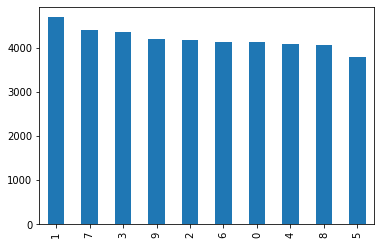

In [ ]:
train_label.value_counts().plot.bar()

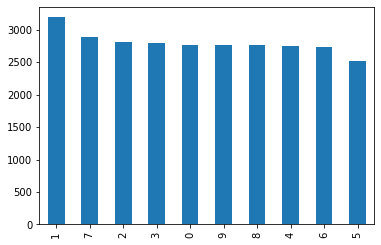

In [ ]:
test_label.value_counts().plot.bar()

In [ ]:
print(train_data.shape)

(42000, 784)


In [ ]:
train_data = train_data.values.reshape(train_data.shape[0], 28, 28)

In [ ]:
train_data = train_data / 255.0

In [ ]:
print(test_data.shape)

(28000, 784)


In [ ]:
test_data = test_data.values.reshape(test_data.shape[0], 28,28)
test_data = test_data / 255.0

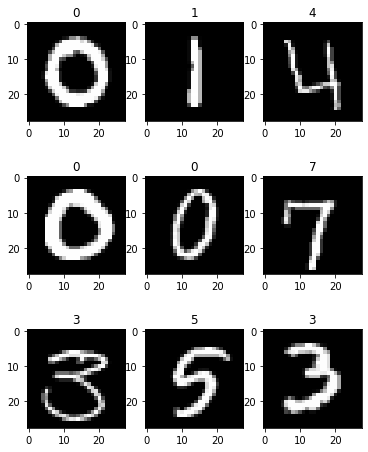

In [ ]:
fig = plt.figure(figsize=(6,8))
for i in range(1, 10):
    fig.add_subplot(3,3,i)
    plt.imshow(train_data[i],cmap='gray')
    plt.grid(False)
    plt.title(train_label[i])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

In [ ]:
model.compile(optimizer = "adam", loss = tf.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
trainer = model.fit(train_data, train_label, epochs = 10)

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2881 - accuracy: 0.9178
Epoch 2/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1270 - accuracy: 0.9625
Epoch 3/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0869 - accuracy: 0.9740
Epoch 4/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0643 - accuracy: 0.9802
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0491 - accuracy: 0.9852
Epoch 6/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0392 - accuracy: 0.9881
Epoch 7/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0310 - accuracy: 0.9906
Epoch 8/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0239 - accuracy: 0.9931
Epoch 9/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0203 - accuracy: 0.9938
Epoch 10/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.015

In [ ]:
def plot_training(history):
    fig, axs = plt.subplots(1,2,figsize=(16,5)) 
    axs[0].plot(history.history['accuracy'], 'c') 
    axs[0].set_title('Model Accuracy') 
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch') 
    axs[0].legend(['train', 'validate'], loc='upper left') 
    
    axs[1].plot(history.history['loss'], 'c') 
    axs[1].set_title('Model Loss') 
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch') 
    axs[1].legend(['train', 'validate'], loc='upper right') 
    plt.show()

{'loss': [0.288144052028656, 0.12698937952518463, 0.08688236027956009, 0.06433343887329102, 0.04907843470573425, 0.03922127187252045, 0.030950965359807014, 0.023936983197927475, 0.020315976813435555, 0.015785209834575653], 'accuracy': [0.9177857041358948, 0.9624999761581421, 0.9739523530006409, 0.9801666736602783, 0.9852142930030823, 0.988095223903656, 0.9906428456306458, 0.9930952191352844, 0.9938333630561829, 0.9955952167510986]}


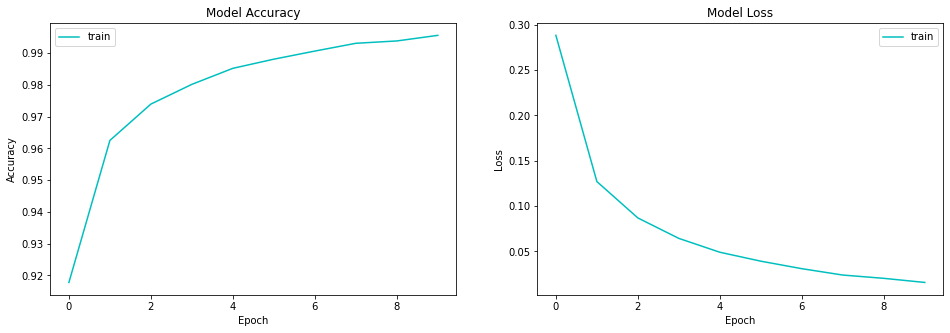

In [ ]:
print(trainer.history)
plot_training(trainer)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


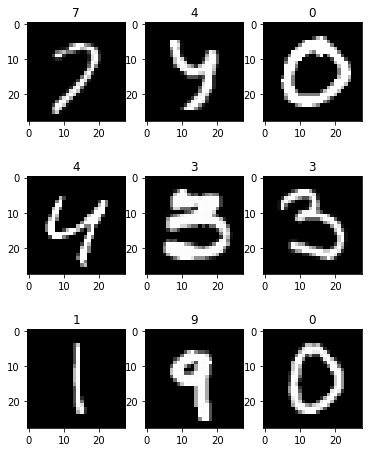

In [ ]:
test_result = model.predict_classes(test_data)
fig = plt.figure(figsize=(6,8))
for i in range(1, 10):
    image = test_data[i+10]
    label = test_result[i+10]
    fig.add_subplot(3,3,i)
    plt.imshow(image,cmap='gray')
    plt.grid(False)
    plt.title(label)

In [ ]:
score = model.evaluate(test_data, test_label, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.09790273755788803
Test accuracy: 0.9741071462631226
